In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
import random

Importing the dataset

In [2]:
data = pd.read_csv(r'D:\Courses\Machine Learning Practical\Predicting the likelihood of e-signing a loan based on financial history\P39-CS5-Python-Dataset\P39-Financial-Data.csv')

In [3]:
data.head(3)

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,3560428,61,weekly,0,3180,0,6,3,2,7,...,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,0
2,6934997,23,weekly,0,1540,6,0,0,7,1,...,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0


In [4]:
data.describe(include = 'all')

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,...,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,bi-weekly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.596978e+06,43.015412,NaN,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,...,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,NaN,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,...,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,NaN,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,NaN,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,NaN,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,...,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,NaN,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,...,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000


In [5]:
data.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

Visualization

In [6]:
data2 = data.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'], axis = 1)

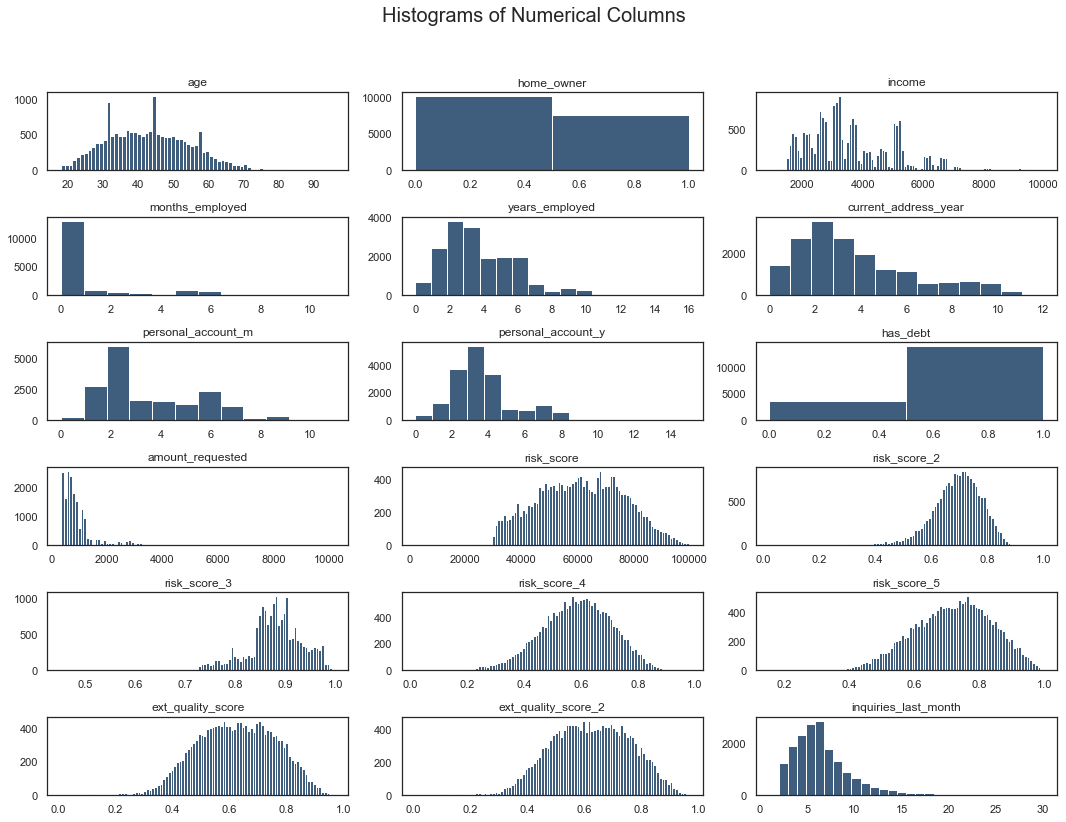

In [7]:
image = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(data2.shape[1]):
    plt.subplot(6, 3, i + 1)
    fig = plt.gca()
    fig.set_title(data2.columns.values[i])

    val = np.size(data2.iloc[:, i].unique())
    if val >= 100:
        val = 100
    
    plt.hist(data2.iloc[:, i], bins=val, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


Correlation

<AxesSubplot:title={'center':'Correlation with target'}>

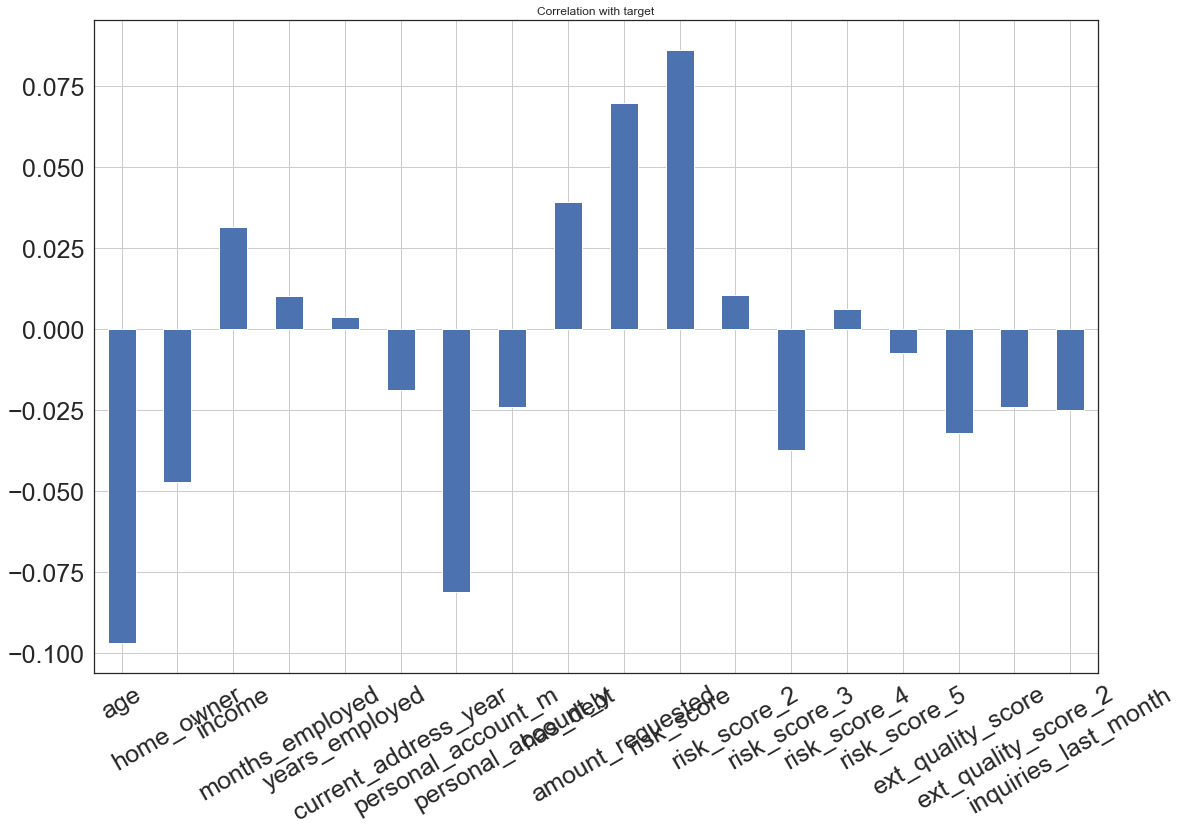

In [8]:
data2.corrwith(data['e_signed']).plot.bar(figsize = (18,12), title = 'Correlation with target', 
                                          fontsize = 25, rot = 30, grid = True)

In [9]:
corr = data2.corr()

In [10]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

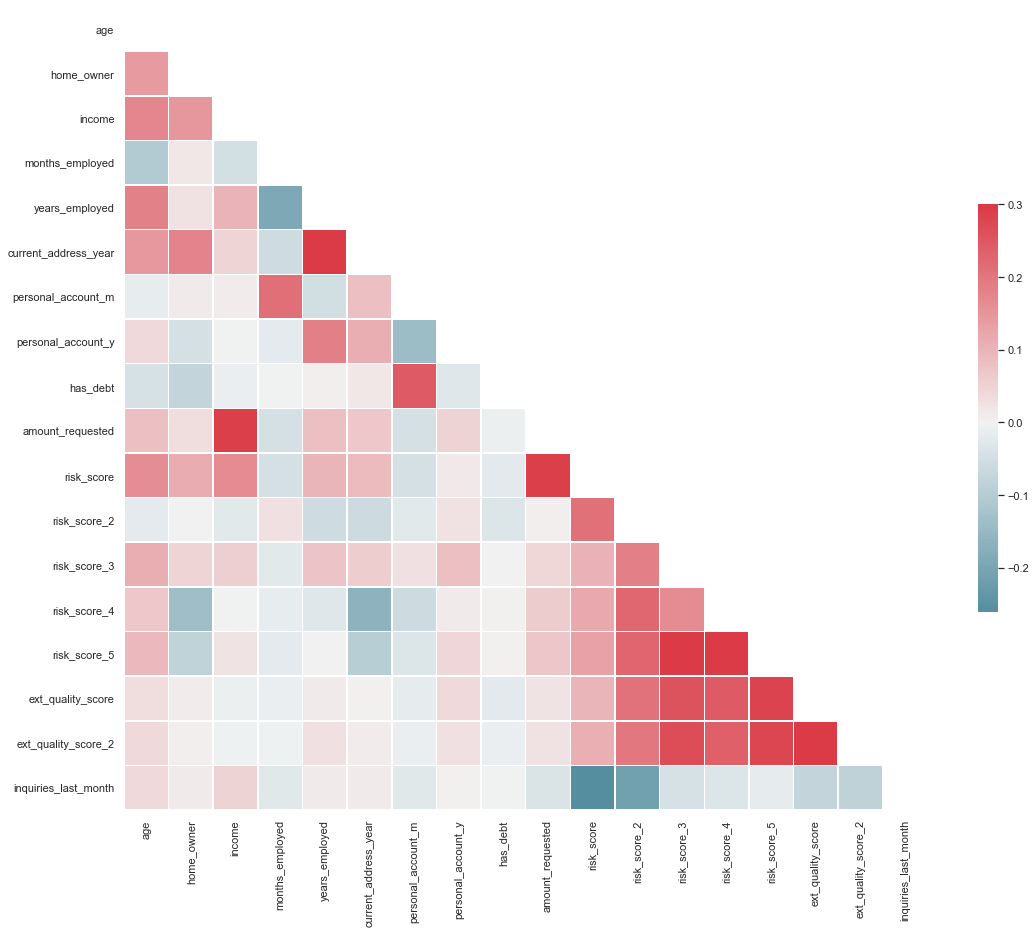

In [11]:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Feature Engineering

In [12]:
random.seed(24)

In [13]:
data.drop(columns = ['months_employed'], axis = 1, inplace = True)

In [14]:
data['personal_account_months'] = data['personal_account_m'] + data['personal_account_y']*12

In [15]:
data[['personal_account_m', 'personal_account_y', 'personal_account_months']].head(4)

,personal_account_m,personal_account_y,personal_account_months
0,6,2,30
1,2,7,86
2,7,1,19
3,2,7,86


In [16]:
data.drop(['personal_account_m', 'personal_account_y'], axis = 1, inplace = True)

One-Hot Encoding

In [17]:
data = pd.get_dummies(data)

In [18]:
data.columns

Index(['entry_id', 'age', 'home_owner', 'income', 'years_employed',
       'current_address_year', 'has_debt', 'amount_requested', 'risk_score',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5',
       'ext_quality_score', 'ext_quality_score_2', 'inquiries_last_month',
       'e_signed', 'personal_account_months', 'pay_schedule_bi-weekly',
       'pay_schedule_monthly', 'pay_schedule_semi-monthly',
       'pay_schedule_weekly'],
      dtype='object')

In [19]:
data.drop('pay_schedule_weekly', axis = 1, inplace = True)

In [20]:
target = data['e_signed']
user_id = data['entry_id']

In [21]:
data.drop(['e_signed', 'entry_id'], axis =1, inplace = True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
inputs_train, inputs_test, target_train, target_test = train_test_split(
                        data, target, test_size=0.15, random_state=432)

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()

In [26]:
inputs_train2 = pd.DataFrame(sc.fit_transform(inputs_train))

In [27]:
inputs_train2.columns = inputs_train.columns.values
inputs_train2.index = inputs_train.index.values

In [28]:
inputs_test2 = pd.DataFrame(sc.transform(inputs_test))

In [29]:
inputs_test2.columns = inputs_test.columns.values
inputs_test2.index = inputs_test.index.values

In [30]:
inputs_train = inputs_train2
inputs_test = inputs_test2

Model Building

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(random_state = 432)

In [33]:
model.fit(inputs_train, target_train)

LogisticRegression(random_state=432)

In [34]:
pred = model.predict(inputs_test)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
cm = confusion_matrix(target_test, pred)

<AxesSubplot:>

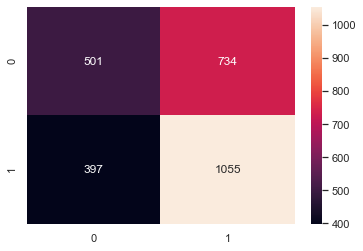

In [37]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [38]:
print(classification_report(target_test, pred))

              precision    recall  f1-score   support

           0       0.56      0.41      0.47      1235
           1       0.59      0.73      0.65      1452

    accuracy                           0.58      2687
   macro avg       0.57      0.57      0.56      2687
weighted avg       0.58      0.58      0.57      2687



Model Building using SVM

In [39]:
from sklearn.svm import SVC

In [40]:
model = SVC(random_state = 432, kernel = 'rbf')

In [41]:
model.fit(inputs_train, target_train)

SVC(random_state=432)

In [42]:
pred_svm = model.predict(inputs_test)

In [43]:
cm_svm = confusion_matrix(target_test, pred_svm)

<AxesSubplot:>

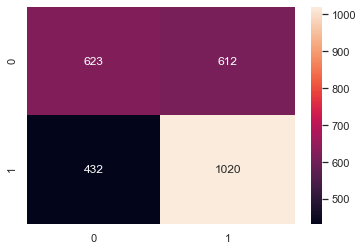

In [44]:
sns.heatmap(cm_svm, annot = True, fmt = 'g')

In [45]:
print(classification_report(target_test, pred_svm))

              precision    recall  f1-score   support

           0       0.59      0.50      0.54      1235
           1       0.62      0.70      0.66      1452

    accuracy                           0.61      2687
   macro avg       0.61      0.60      0.60      2687
weighted avg       0.61      0.61      0.61      2687



Model Building using Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_rm = RandomForestClassifier(random_state = 432, n_estimators = 80, criterion = 'entropy')

In [48]:
model_rm.fit(inputs_train, target_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=432)

In [49]:
pred_rm = model_rm.predict(inputs_test)

In [50]:
cm_rm = confusion_matrix(target_test, pred_rm)

<AxesSubplot:>

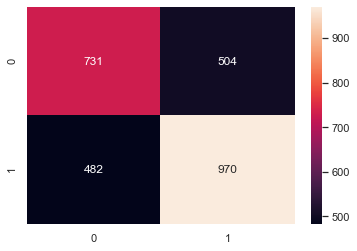

In [51]:
sns.heatmap(cm_rm, annot = True, fmt = 'g')

In [52]:
print(classification_report(target_test, pred_rm))

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1235
           1       0.66      0.67      0.66      1452

    accuracy                           0.63      2687
   macro avg       0.63      0.63      0.63      2687
weighted avg       0.63      0.63      0.63      2687



K-fold Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
acc = cross_val_score(estimator = model_rm, X = inputs_train, y = target_train, cv = 10)

In [55]:
print('Accuracy : %0.2f (+/- %0.2f)' % (acc.mean(), acc.std()*2))

Accuracy : 0.63 (+/- 0.02)


Grid Search: Entropy 1

In [56]:
param = {'max_depth' : [3,None], 'max_features' : [1,5,10],
        'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,5,10],
         'bootstrap': [True, False], 'criterion': ['entropy']}

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid_search = GridSearchCV(estimator = model_rm, param_grid = param, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [59]:
import time

In [60]:
time_est = time.time()

In [63]:
grid_search = grid_search.fit(inputs_train, target_train)
t1 = time.time()
print('Time taken : %0.2f seconds' % (t1 - time_est))

Time taken : 1610.05 seconds


In [64]:
rf_best_acc = grid_search.best_score_
rf_best_param = grid_search.best_params_
rf_best_acc, rf_best_param

(0.6357666459879742,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 2})

Grid Search: Entropy 2

In [65]:
param2 = {'max_depth' : [None], 'max_features' : [3,5,7],
        'min_samples_split' : [8,10,12], 'min_samples_leaf' : [1,2,3],
         'bootstrap': [True, False], 'criterion': ['entropy']}

In [67]:
grid_search2 = GridSearchCV(estimator = model_rm, param_grid = param2, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [68]:
grid_search2 = grid_search2.fit(inputs_train, target_train)
t2 = time.time()
print('Time taken : %0.2f seconds' % (t2 - time_est))

Time taken : 2678.77 seconds


In [75]:
rf_best_acc2 = grid_search2.best_score_
rf_best_param2 = grid_search2.best_params_
rf_best_acc2, rf_best_param2

(0.6355031005096622,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 7,
  'min_samples_leaf': 3,
  'min_samples_split': 12})

In [77]:
pred_gs = grid_search2.predict(inputs_test)

In [78]:
cm = confusion_matrix(target_test, pred_gs)

<AxesSubplot:>

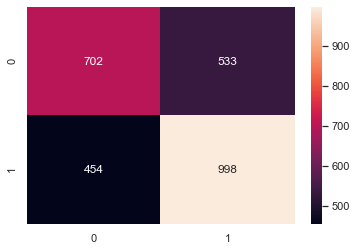

In [79]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [80]:
print(classification_report(target_test, pred_gs))

              precision    recall  f1-score   support

           0       0.61      0.57      0.59      1235
           1       0.65      0.69      0.67      1452

    accuracy                           0.63      2687
   macro avg       0.63      0.63      0.63      2687
weighted avg       0.63      0.63      0.63      2687



Grid Search: Gini 1

In [81]:
param_gini = {'max_depth' : [3,None], 'max_features' : [1,5,10],
        'min_samples_split' : [2,5,10], 'min_samples_leaf' : [1,5,10],
         'bootstrap': [True, False], 'criterion': ['gini']}

grid_search_g1 = GridSearchCV(estimator = model_rm, param_grid = param_gini, scoring = 'accuracy', cv = 10, n_jobs = -1)

time_est = time.time()
grid_search_g1 = grid_search_g1.fit(inputs_train, target_train)
t1 = time.time()
print('Time taken : %0.2f seconds' % (t1 - time_est))

rf_best_acc_g1 = grid_search_g1.best_score_
rf_best_param_g1 = grid_search_g1.best_params_
rf_best_acc_g1, rf_best_param_g1

Time taken : 288.92 seconds


(0.6343875727672836,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

Grid Search: Gini 2

In [84]:
param_gini2 = {'max_depth' : [None], 'max_features' : [8,10,12],
        'min_samples_split' : [1,2,3], 'min_samples_leaf' : [3,5,7],
         'bootstrap': [True], 'criterion': ['gini']}

grid_search_g2 = GridSearchCV(estimator = model_rm, param_grid = param_gini2, scoring = 'accuracy', cv = 10, n_jobs = -1)

time_est = time.time()
grid_search_g2 = grid_search_g2.fit(inputs_train, target_train)
t1 = time.time()
print('Time taken : %0.2f seconds' % (t1 - time_est))

rf_best_acc_g2 = grid_search_g2.best_score_
rf_best_param_g2 = grid_search_g2.best_params_
rf_best_acc_g2, rf_best_param_g2

Time taken : 107.27 seconds


(0.6343875727672836,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [87]:
pred_gs2 = grid_search_g2.predict(inputs_test)

cm = confusion_matrix(target_test, pred_gs2)


<AxesSubplot:>

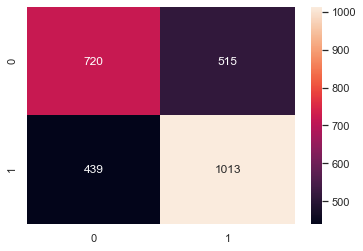

In [88]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [89]:
print(classification_report(target_test, pred_gs2))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60      1235
           1       0.66      0.70      0.68      1452

    accuracy                           0.64      2687
   macro avg       0.64      0.64      0.64      2687
weighted avg       0.64      0.64      0.64      2687



In [90]:
result = pd.concat([target_test, user_id], axis = 1).dropna()
result['Predictions'] = pred_gs2

In [91]:
result = result[['entry_id', 'e_signed', 'Predictions']]

In [94]:
pd.options.display.max_rows = 99999

In [98]:
result

,entry_id,e_signed,Predictions
29,1364529,0.0,1
36,7581828,1.0,0
39,3344880,1.0,0
44,8700190,1.0,1
52,2154744,1.0,1
61,3786494,0.0,1
64,2649891,1.0,0
65,9217393,0.0,1
66,5627791,0.0,1
79,8884442,1.0,0
